In [1]:
from jaxtyping import install_import_hook
import numpy as np

# with install_import_hook("prediction", ("beartype", "beartype")):
import prediction

ds = prediction.Dataset.from_npz("data.npz")

In [2]:
from functools import partial

model = partial(
    prediction.models.embedding,
    ds, X_p=True, X_m=True, alpha=0.001, layers=[64, 64], shape=ds.data.shape, dim=4, scale=0.01)

trainer = prediction.CrossValidationTrainer(ds, model, batch=128, replicates=3, k=5, do_baseline=True)

In [11]:
res = trainer.train_replicates(epoch_size=100, epochs=100, p=0.1)

Convergence warning: max(l1_delta)=[0.00019726 0.00026842 0.00014489] after 10 iterations; Increase tol or max_iter.


100%|██████████| 100/100 [01:13<00:00,  1.36it/s]


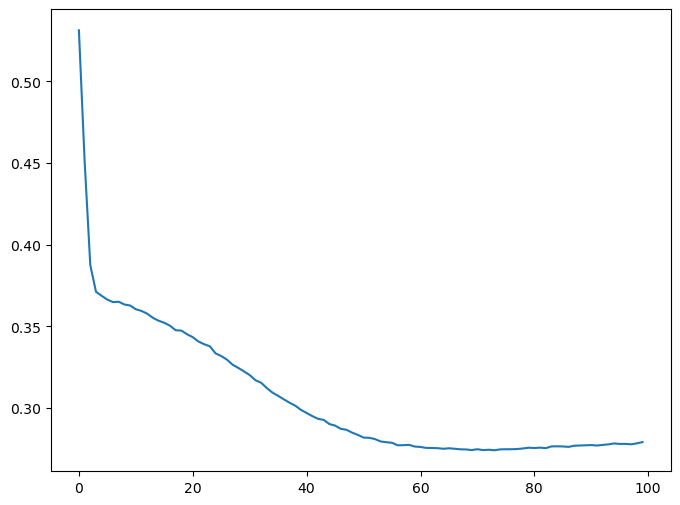

In [25]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.plot(np.sqrt(np.mean(np.mean(res["test_loss"], axis=0), axis=1)))

In [20]:
res['C_hat'].shape

(3, 5, 152, 176)

In [24]:
np.mean(np.abs(np.exp((np.mean(res['C_bar'][0], axis=0) - ds.data)[res["test"][0][:, 0], res["test"][0][:, 1]]) - 1))

1.5294695

In [23]:
np.mean(np.abs(np.exp((np.mean(res['C_hat'][0], axis=0) - ds.data)[res["test"][0][:, 0], res["test"][0][:, 1]]) - 1))

0.14778458

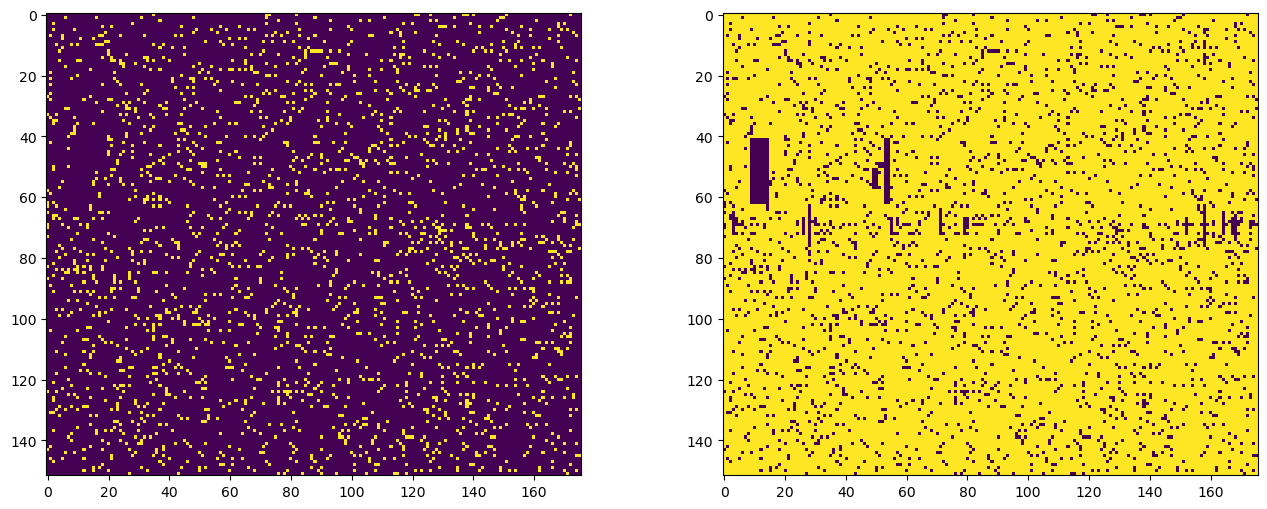

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].imshow(ds.to_mask(res["train"][0, 0]) + ds.to_mask(res["val"][0, 0]))
axs[1].imshow(ds.to_mask(res["test"][0]))

In [18]:
mask = ds.to_mask(res["train"][0, 0])
np.sum(mask, axis=0), np.sum(mask, axis=1)

(Array([ 9,  9, 15, 11,  8, 11,  9, 11,  7, 12,  8,  6,  9, 11,  9, 11,  7,
         7, 13, 10, 10, 14, 10, 10, 16, 10, 10, 14, 12, 13, 12, 10, 12, 13,
        11, 16,  7, 15, 12, 13,  8,  7,  7, 12,  9,  9,  8, 15, 10,  8, 12,
        12, 14,  9,  3,  7,  9, 14,  7,  6, 16, 10,  7, 10,  3, 14,  9, 10,
        12,  8, 12,  8, 10, 10,  8, 10, 15,  5, 10, 15,  7, 15, 20,  9,  4,
        12, 11,  8, 10,  8, 14,  8, 11, 15, 10, 11, 10,  9, 11, 13,  5, 11,
         6, 12,  8,  4, 11,  6, 15, 13,  7, 10,  6, 13, 10, 12, 10, 11, 13,
        10, 12, 12,  8,  8, 11, 12, 11, 10, 18, 16, 13, 13,  7,  7, 10, 16,
        10, 13, 19, 16, 14,  9,  8,  7,  9, 17, 10, 12, 11,  9,  8, 11, 12,
        12, 12,  8, 11, 12,  5, 13, 15, 11, 12, 10, 12,  8, 13,  9, 14,  9,
         9, 13, 14,  8,  9,  6], dtype=int32),
 Array([ 8,  5,  8,  6,  9, 13,  6, 16,  7, 15, 12, 15, 12, 15, 12, 15, 13,
        13, 11,  7, 11,  9,  9, 10, 12, 11, 11,  9, 15, 13, 11, 13, 14, 12,
        10,  7, 13, 11,  7, 13, 11, 11, 1